In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [157]:
# importing datasets from provided excel files
homicidio_vict = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name = 'VICTIMAS')
homicidio_hecho = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name = 'HECHOS')

# normalizing column names
homicidio_hecho.rename(columns = {'ID': 'id', 'N_VICTIMAS': 'num_victimas', 'FECHA': 'fecha', 'AAAA': 'anio', 
                                  'MM': 'mes', 'DD': 'dia', 'HORA': 'hora', 'HH': 'hora_rango',
                                  'LUGAR_DEL_HECHO': 'lugar', 'TIPO_DE_CALLE': 'tipo_calle', 'Calle': 'calle', 
                                  'Altura': 'altura', 'Cruce': 'cruce', 'Dirección Normalizada': 'direc_norm', 
                                  'COMUNA': 'comuna', 'XY (CABA)': 'xy', 'pos x': 'x', 'pos y': 'y', 
                                  'PARTICIPANTES': 'participantes', 'VICTIMA': 'victima', 'ACUSADO': 'acusado'}, 
                                  inplace = True)

homicidio_vict.rename(columns = {'ID_hecho': 'id', 'FECHA': 'fecha', 'AAAA': 'anio', 'MM': 'mes', 'DD': 'dia', 
                                 'ROL': 'rol', 'VICTIMA': 'victima', 'SEXO': 'sexo', 'EDAD': 'edad', 
                                 'FECHA_FALLECIMIENTO': 'fecha_deceso'}, inplace = True)

In [158]:
# tidying up columns type
homicidio_vict["edad"] = pd.to_numeric(homicidio_vict["edad"], errors = 'coerce')
homicidio_vict["sexo"] = homicidio_vict["sexo"].astype('category')
homicidio_vict["victima"] = homicidio_vict["victima"].astype('category')
homicidio_vict["rol"] = homicidio_vict["rol"].astype('category')

homicidio_hecho["participantes"] = homicidio_hecho["participantes"].astype('category')
homicidio_hecho["victima"] = homicidio_hecho["victima"].astype('category')
homicidio_hecho["acusado"] = homicidio_hecho["acusado"].astype('category')
homicidio_hecho["comuna"] = homicidio_hecho["comuna"].astype('category')
homicidio_hecho["tipo_calle"] = homicidio_hecho["tipo_calle"].astype('category')

homicidio_hecho[["id", "direc_norm", "cruce", "calle", "lugar", "xy"]] = homicidio_hecho[["id", "direc_norm", "cruce", "calle", "lugar","xy"]].astype(str)
homicidio_hecho[["x", "y"]] = homicidio_hecho[["x", "y"]].replace(to_replace = '.', value = '0')
homicidio_hecho[["x", "y"]] = homicidio_hecho[["x", "y"]].astype('float64')
homicidio_hecho["hora_rango"] = pd.to_numeric(homicidio_hecho["hora_rango"], errors = 'coerce')
homicidio_hecho["hora_rango"] = homicidio_hecho["hora_rango"].astype('int16', errors = 'ignore')

In [159]:
# looking for NaNs
homicidio_hecho.isna().sum()

id                 0
num_victimas       0
fecha              0
anio               0
mes                0
dia                0
hora               0
hora_rango         1
lugar              0
tipo_calle         0
calle              0
altura           567
cruce              0
direc_norm         0
comuna             0
xy                 0
x                  0
y                  0
participantes      0
victima            0
acusado            0
dtype: int64

In [160]:
homicidio_vict.isna().sum()

id               0
fecha            0
anio             0
mes              0
dia              0
rol              0
victima          0
sexo             0
edad            53
fecha_deceso     0
dtype: int64

In [161]:
# lets imput the sole NaN in homicidio_hecho['hora_rango'], first confirm it comes from the sole register that doesn't have a numerical 'hour'
homicidio_hecho[homicidio_hecho['hora_rango'].isna()].equals(homicidio_hecho[homicidio_hecho['hora'] == 'SD'])

True

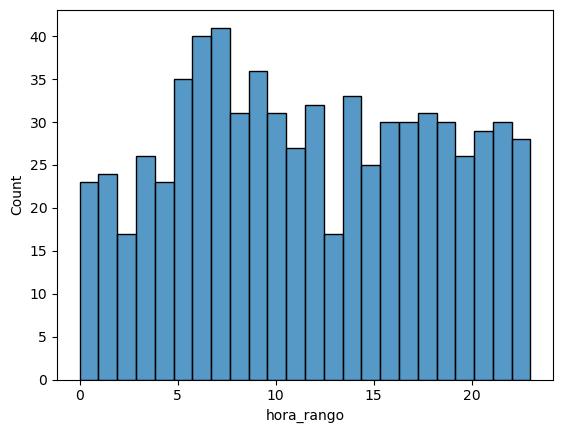

In [162]:
# an histogram of events by daytime hours shows a slight maximum at early morning
sns.histplot(data = homicidio_hecho, x = 'hora_rango', bins=24)
plt.show()
# so lets imput the sole NaN with the hour when statistically occurs most of the events
condition = homicidio_hecho['hora_rango'].isna()
homicidio_hecho.loc[condition, 'hora_rango'] = homicidio_hecho['hora_rango'].value_counts(sort = True).keys()[0]
# and convert 'hora_rango' to integer
homicidio_hecho[["hora_rango"]] = homicidio_hecho[["hora_rango"]].astype('int16')


In [163]:
homicidio_hecho.dtypes

id                       object
num_victimas              int64
fecha            datetime64[ns]
anio                      int64
mes                       int64
dia                       int64
hora                     object
hora_rango                int16
lugar                    object
tipo_calle             category
calle                    object
altura                  float64
cruce                    object
direc_norm               object
comuna                 category
xy                       object
x                       float64
y                       float64
participantes          category
victima                category
acusado                category
dtype: object

In [164]:
# making a new column in homicidio_vict for the age group of the victim
def age_group(x:int):
    if not isinstance(x, float):
        return -1
    if x in range(0,5):
        return 1
    elif x in range(5,13):
        return 2
    elif x in range(13,18):
        return 3
    elif x in range(18,30):
        return 4
    elif x in range(30,60):
        return 5
    else:
        return 6

homicidio_vict['edad_rango'] = homicidio_vict['edad'].apply(age_group)

In [165]:
homicidio_vict.head(10)

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_deceso,edad_rango
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00,4
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 00:00:00,6
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00,5
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,SD,4
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00,4
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-24 00:00:00,5
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29.0,2016-01-26 00:00:00,4
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-29 00:00:00,4
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22.0,2016-02-08 00:00:00,4
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16.0,2016-02-10 00:00:00,3


In [166]:
def dia_semana(x:datetime):
    week_day = calendar.day_name[x.weekday()]
    return week_day

homicidio_hecho['dia_semana'] = homicidio_hecho['fecha'].apply(dia_semana)
homicidio_hecho.head()

,id,num_victimas,fecha,anio,mes,dia,hora,hora_rango,lugar,tipo_calle,...,cruce,direc_norm,comuna,xy,x,y,participantes,victima,acusado,dia_semana
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Friday
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,nan,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Sunday
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Sunday
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday


In [155]:
# writing output files
homicidio_hecho.to_csv('./Datasets/homicidio_hecho.csv', sep = '|', encoding = 'utf-8')
homicidio_vict.to_csv('./Datasets/homicidio_vict.csv', sep = '|', encoding = 'utf-8')

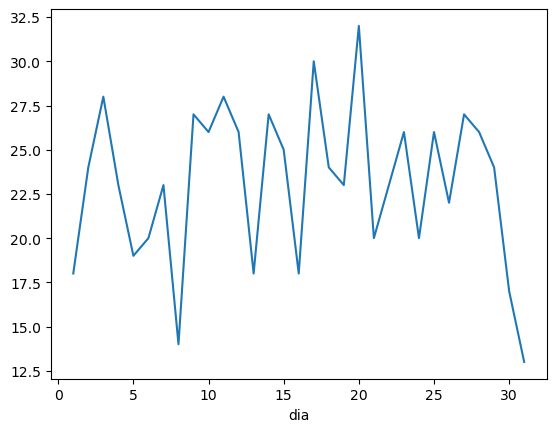

In [167]:
sns.lineplot(x = homicidio_hecho.groupby('dia')['num_victimas'].sum().keys(), 
             y = homicidio_hecho.groupby('dia')['num_victimas'].sum().values)
plt.show()

Matriz victima vs acusado

In [243]:
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [188]:
victima_lst = list(homicidio_hecho.victima.unique())
acusado_lst = list(homicidio_hecho.acusado.unique())
victima_acusado_mat = pd.DataFrame(columns = acusado_lst, index = victima_lst)

In [209]:
for i in victima_lst:
    condition = homicidio_hecho['victima'] == i
    temp2_df = homicidio_hecho.loc[condition, :]
    row_dict = dict(temp2_df.groupby('acusado')['num_victimas'].sum())
    victima_acusado_mat.loc[i] = row_dict
victima_acusado_mat = victima_acusado_mat.astype('int32')
sns.heatmap(victima_acusado_mat, annot = True)
plt.show()